In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('spam_ham_dataset.csv')
print(df)


      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

In [2]:
import string
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,LSTM,Embedding,Flatten

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('words')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sreea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sreea\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [4]:
print(df['text'])

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
mails=df['text'].to_list()

In [7]:
print(mails[0])

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


In [8]:
r=Tokenizer()
r.fit_on_texts(mails)
#r.word_counts
k=r.texts_to_sequences(mails)
print(k[0])

[9, 18, 1043, 44, 13702, 16, 15, 8, 679, 82, 3, 2, 434, 17, 2013, 10, 14, 409, 69, 36, 60, 9840, 176, 479, 687, 35, 54, 1, 33, 8749, 3298, 11, 28, 241, 131, 2151, 655, 3, 1202, 889, 438, 10, 53, 3299, 22, 37, 560, 1, 16, 170, 15, 603, 1610, 6, 4370, 1975]


In [9]:
print(len(k[0]))

56


In [10]:
from keras.utils import pad_sequences

In [11]:
print(len(k))


5171


In [15]:
min(k[0])
l=[]
for i in k :
   l.append(len(i))
max(l)    
new=pad_sequences(k,padding='post',maxlen=100,truncating='post')
print(new[0])

[    9    18  1043    44 13702    16    15     8   679    82     3     2
   434    17  2013    10    14   409    69    36    60  9840   176   479
   687    35    54     1    33  8749  3298    11    28   241   131  2151
   655     3  1202   889   438    10    53  3299    22    37   560     1
    16   170    15   603  1610     6  4370  1975     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [17]:
y=df['label_num']
y=y.to_list()

In [28]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(new,y,test_size=0.2)
print(len(r.word_index)+1)

57872


In [44]:
model=Sequential()
model.add(Embedding((len(r.word_index)+1),2,input_length=100))

model.add(LSTM(8))
model.add(Dense(1,activation='sigmoid'))
model.add(Flatten())


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
model.summary()

history = model.fit(x_train, y_train, epochs=2, batch_size=100, verbose=1, validation_data=(x_test, y_test))


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 2)              │         115,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 8)                   │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,105 (453.54 KB)

 Trainable params: 116,105 (453.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.7125 - loss: 0.5913 - val_accuracy: 0.7111 - val_loss: 0.5874
Epoch 2/2
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7150 - loss: 0.5724 - val_accuracy: 0.7111 - val_loss: 0.5455


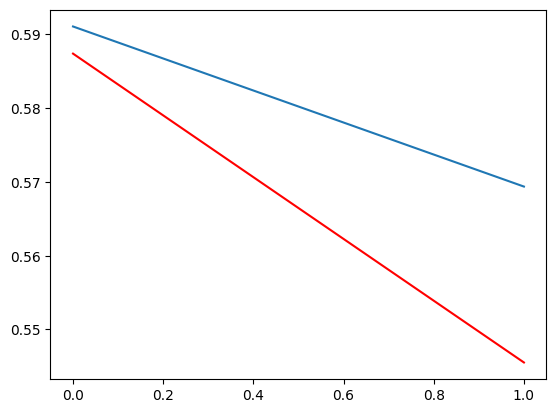

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')



In [69]:
#x_new=np.random.randint(1,len(r.word_index)+1,size=(1,100))
x_new=x_train[0].reshape(1,100)
y_new=y_train[0].reshape(1,1)
xloss,mae=model.evaluate(x_new,y_new,batch_size=1)
y_new=model.predict(x_new)
print(xloss)
y_new.reshape(1,)
if y[0]<0.5:
 print("spam")

ValueError: Cannot take the length of shape with unknown rank.